## 机器学习策略——基于SVM回归算法预测股市收益率

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts
import seaborn
%matplotlib inline

### 1. 数据获取

In [2]:
hs300 = ts.get_k_data('hs300', '2005-01-01', '2017-06-30')
hs300.set_index('date',inplace = True)
hs300.index = pd.to_datetime(hs300.index)    #因为要merge操作，要把date转换成日期格式；
hs300.head()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,close,high,low,volume,code
date,,,,,,
2005-04-08,984.66,1003.45,1003.70,979.53,14762500.0,hs300
2005-04-11,1003.88,995.42,1008.73,992.77,15936100.0,hs300
2005-04-12,993.71,978.70,993.71,978.20,10226200.0,hs300
2005-04-13,987.95,1000.90,1006.50,987.95,16071700.0,hs300
2005-04-14,1004.64,986.97,1006.42,985.58,12945700.0,hs300


In [3]:
hs300.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2973 entries, 2005-04-08 to 2017-06-30
Data columns (total 6 columns):
open      2973 non-null float64
close     2973 non-null float64
high      2973 non-null float64
low       2973 non-null float64
volume    2973 non-null float64
code      2973 non-null object
dtypes: float64(5), object(1)
memory usage: 162.6+ KB


In [4]:
hs300_close = hs300['close']

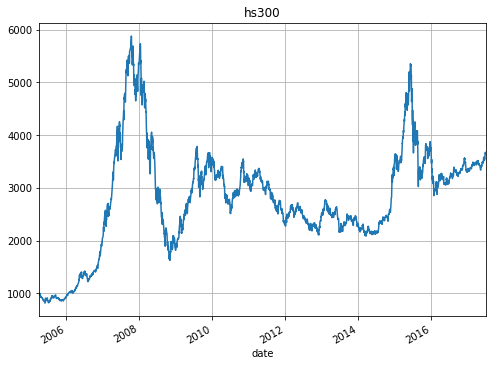

In [6]:
hs300.close.plot(figsize = (8,6),title = 'hs300', grid = True)


### 2. 特征工程


In [8]:
for i in range(1, 21, 1):
    hs300['close - ' + str(i) + 'd'] = hs300['close'].shift(i)

In [9]:
hs300.head(21)

,open,close,high,low,volume,code,close - 1d,close - 2d,close - 3d,close - 4d,...,close - 11d,close - 12d,close - 13d,close - 14d,close - 15d,close - 16d,close - 17d,close - 18d,close - 19d,close - 20d
date,,,,,,,,,,,,,,,,,,,,,
2005-04-08,984.66,1003.45,1003.70,979.53,14762500.0,hs300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-11,1003.88,995.42,1008.73,992.77,15936100.0,hs300,1003.45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-12,993.71,978.70,993.71,978.20,10226200.0,hs300,995.42,1003.45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-13,987.95,1000.90,1006.50,987.95,16071700.0,hs300,978.70,995.42,1003.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-14,1004.64,986.97,1006.42,985.58,12945700.0,hs300,1000.90,978.70,995.42,1003.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-15,982.61,974.08,982.61,971.93,10409000.0,hs300,986.97,1000.90,978.70,995.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-18,970.91,963.77,970.91,958.65,8598400.0,hs300,974.08,986.97,1000.90,978.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-19,962.92,965.89,968.87,957.91,9212620.0,hs300,963.77,974.08,986.97,1000.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-20,964.15,950.87,964.15,946.20,8850700.0,hs300,965.89,963.77,974.08,986.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
hs_20d = hs300[[x for x in hs300.columns if 'close' in x]].iloc[20:]

In [11]:
hs_20d.head()

,close,close - 1d,close - 2d,close - 3d,close - 4d,close - 5d,close - 6d,close - 7d,close - 8d,close - 9d,...,close - 11d,close - 12d,close - 13d,close - 14d,close - 15d,close - 16d,close - 17d,close - 18d,close - 19d,close - 20d
date,,,,,,,,,,,,,,,,,,,,,
2005-05-13,887.54,885.82,901.85,913.08,909.17,932.40,942.07,926.60,937.08,930.07,...,943.98,950.87,965.89,963.77,974.08,986.97,1000.90,978.70,995.42,1003.45
2005-05-16,875.27,887.54,885.82,901.85,913.08,909.17,932.40,942.07,926.60,937.08,...,939.10,943.98,950.87,965.89,963.77,974.08,986.97,1000.90,978.70,995.42
2005-05-17,881.46,875.27,887.54,885.82,901.85,913.08,909.17,932.40,942.07,926.60,...,930.07,939.10,943.98,950.87,965.89,963.77,974.08,986.97,1000.90,978.70
2005-05-18,883.20,881.46,875.27,887.54,885.82,901.85,913.08,909.17,932.40,942.07,...,937.08,930.07,939.10,943.98,950.87,965.89,963.77,974.08,986.97,1000.90
2005-05-19,884.17,883.20,881.46,875.27,887.54,885.82,901.85,913.08,909.17,932.40,...,926.60,937.08,930.07,939.10,943.98,950.87,965.89,963.77,974.08,986.97


In [12]:
hs_20d = hs_20d.iloc[:,::-1]                #转换特征的顺序；

In [13]:
hs_20d.head()

,close - 20d,close - 19d,close - 18d,close - 17d,close - 16d,close - 15d,close - 14d,close - 13d,close - 12d,close - 11d,...,close - 9d,close - 8d,close - 7d,close - 6d,close - 5d,close - 4d,close - 3d,close - 2d,close - 1d,close
date,,,,,,,,,,,,,,,,,,,,,
2005-05-13,1003.45,995.42,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,...,930.07,937.08,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54
2005-05-16,995.42,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,...,937.08,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27
2005-05-17,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,...,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46
2005-05-18,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,937.08,...,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46,883.20
2005-05-19,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,937.08,926.60,...,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46,883.20,884.17


### 3. 测试集表现

In [12]:
from sklearn import svm

In [13]:
clf = svm.SVR(kernel='linear')  # define SVM model assign to clf

#### 3.1 生成训练集和测试集 

In [14]:
features_train = hs_20d[:2000]
features_train.head()

,close,close - 1d,close - 2d,close - 3d,close - 4d,close - 5d,close - 6d,close - 7d,close - 8d,close - 9d,...,close - 11d,close - 12d,close - 13d,close - 14d,close - 15d,close - 16d,close - 17d,close - 18d,close - 19d,close - 20d
date,,,,,,,,,,,,,,,,,,,,,
2005-05-13,887.54,885.82,901.85,913.08,909.17,932.40,942.07,926.60,937.08,930.07,...,943.98,950.87,965.89,963.77,974.08,986.97,1000.90,978.70,995.42,1003.45
2005-05-16,875.27,887.54,885.82,901.85,913.08,909.17,932.40,942.07,926.60,937.08,...,939.10,943.98,950.87,965.89,963.77,974.08,986.97,1000.90,978.70,995.42
2005-05-17,881.46,875.27,887.54,885.82,901.85,913.08,909.17,932.40,942.07,926.60,...,930.07,939.10,943.98,950.87,965.89,963.77,974.08,986.97,1000.90,978.70
2005-05-18,883.20,881.46,875.27,887.54,885.82,901.85,913.08,909.17,932.40,942.07,...,937.08,930.07,939.10,943.98,950.87,965.89,963.77,974.08,986.97,1000.90
2005-05-19,884.17,883.20,881.46,875.27,887.54,885.82,901.85,913.08,909.17,932.40,...,926.60,937.08,930.07,939.10,943.98,950.87,965.89,963.77,974.08,986.97


In [15]:
labels_train = hs_20d['close'].shift(-1)[:2000]     #回归问题的标签就是预测的就是股价，下一天的收盘价就是前一天的标签；
labels_train.head()

date
2005-05-13    875.27
2005-05-16    881.46
2005-05-17    883.20
2005-05-18    884.17
2005-05-19    882.76
Name: close, dtype: float64

In [16]:
features_test = hs_20d[2000:]
features_test.head()

,close,close - 1d,close - 2d,close - 3d,close - 4d,close - 5d,close - 6d,close - 7d,close - 8d,close - 9d,...,close - 11d,close - 12d,close - 13d,close - 14d,close - 15d,close - 16d,close - 17d,close - 18d,close - 19d,close - 20d
date,,,,,,,,,,,,,,,,,,,,,
2013-08-02,2247.26,2245.36,2193.02,2189.39,2175.97,2224.01,2237.68,2249.15,2265.84,2202.19,...,2245.33,2282.84,2317.85,2307.30,2275.37,2326.69,2224.06,2162.67,2163.62,2226.85
2013-08-05,2278.33,2247.26,2245.36,2193.02,2189.39,2175.97,2224.01,2237.68,2249.15,2265.84,...,2190.48,2245.33,2282.84,2317.85,2307.30,2275.37,2326.69,2224.06,2162.67,2163.62
2013-08-06,2293.64,2278.33,2247.26,2245.36,2193.02,2189.39,2175.97,2224.01,2237.68,2249.15,...,2202.19,2190.48,2245.33,2282.84,2317.85,2307.30,2275.37,2326.69,2224.06,2162.67
2013-08-07,2280.62,2293.64,2278.33,2247.26,2245.36,2193.02,2189.39,2175.97,2224.01,2237.68,...,2265.84,2202.19,2190.48,2245.33,2282.84,2317.85,2307.30,2275.37,2326.69,2224.06
2013-08-08,2276.78,2280.62,2293.64,2278.33,2247.26,2245.36,2193.02,2189.39,2175.97,2224.01,...,2249.15,2265.84,2202.19,2190.48,2245.33,2282.84,2317.85,2307.30,2275.37,2326.69


In [17]:
labels_test = hs_20d['close'].shift(-1)[2000:]
labels_test.head()

date
2013-08-02    2278.33
2013-08-05    2293.64
2013-08-06    2280.62
2013-08-07    2276.78
2013-08-08    2286.01
Name: close, dtype: float64

#### 3.2 模型训练

In [18]:
clf.fit(features_train, labels_train)     #模型的训练过程；

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
predict = clf.predict(features_test)      #给你测试集的特征，返回的是测试集的标签，回归问题的标签就是股价；

In [20]:
predict[:50]

array([2217.11072556, 2260.60406908, 2289.39561218, 2330.88600747,
       2299.74236831, 2262.29121348, 2331.56916017, 2355.38241164,
       2371.48914735, 2360.10020461, 2328.64521916, 2350.72028264,
       2330.95178116, 2314.13151143, 2319.54446365, 2282.53730107,
       2373.92162191, 2369.56131966, 2351.51962697, 2305.26468919,
       2281.81000951, 2339.03602585, 2382.77843934, 2369.25610211,
       2330.64279328, 2340.76798999, 2455.76898287, 2497.72621266,
       2507.80361375, 2498.92303268, 2472.91447302, 2499.85543871,
       2457.9757684 , 2481.2323506 , 2475.70518933, 2427.69570563,
       2453.06728781, 2437.89409491, 2442.56065322, 2425.98510275,
       2429.76138402, 2454.61381916, 2422.56824967, 2467.52479736,
       2479.20118379, 2490.6844929 , 2438.0049767 , 2387.68806743,
       2411.042584  , 2487.84871159])

In [21]:
df = pd.DataFrame(labels_test)

In [22]:
df['predict'] = predict     #把前面预测的测试集的股价给添加到DataFrame中；
df = df.rename(columns = {'close': 'Next Close', 'predict':'Predict Next Close'})

In [23]:
df.head()

,Next Close,Predict Next Close
date,,
2013-08-02,2278.33,2217.110726
2013-08-05,2293.64,2260.604069
2013-08-06,2280.62,2289.395612
2013-08-07,2276.78,2330.886007
2013-08-08,2286.01,2299.742368


In [24]:
current_close = hs_20d[['close']].iloc[2000:]
current_close.head()

,close
date,
2013-08-02,2247.26
2013-08-05,2278.33
2013-08-06,2293.64
2013-08-07,2280.62
2013-08-08,2276.78


In [25]:
next_open = hs300[['open']].iloc[2020:].shift(-1)    #把8月3号的开盘价放到了8月2号的位置；
next_open.head()

,open
date,
2013-08-02,2249.98
2013-08-05,2270.67
2013-08-06,2292.38
2013-08-07,2277.25
2013-08-08,2288.51


In [26]:
df1 = pd.merge(df, current_close, left_index=True, right_index=True)
df1.head()

,Next Close,Predict Next Close,close
date,,,
2013-08-02,2278.33,2217.110726,2247.26
2013-08-05,2293.64,2260.604069,2278.33
2013-08-06,2280.62,2289.395612,2293.64
2013-08-07,2276.78,2330.886007,2280.62
2013-08-08,2286.01,2299.742368,2276.78


In [27]:
df2 = pd.merge(df1, next_open, left_index=True, right_index=True)

In [28]:
df2.head()

,Next Close,Predict Next Close,close,open
date,,,,
2013-08-02,2278.33,2217.110726,2247.26,2249.98
2013-08-05,2293.64,2260.604069,2278.33,2270.67
2013-08-06,2280.62,2289.395612,2293.64,2292.38
2013-08-07,2276.78,2330.886007,2280.62,2277.25
2013-08-08,2286.01,2299.742368,2276.78,2288.51


In [30]:
df2.columns = ['Next Close', 'Predicted Next Close', 'Current Close', 'Next Open']

In [31]:
df2.head()

,Next Close,Predicted Next Close,Current Close,Next Open
date,,,,
2013-08-02,2278.33,2217.110726,2247.26,2249.98
2013-08-05,2293.64,2260.604069,2278.33,2270.67
2013-08-06,2280.62,2289.395612,2293.64,2292.38
2013-08-07,2276.78,2330.886007,2280.62,2277.25
2013-08-08,2286.01,2299.742368,2276.78,2288.51


#### 3.3 模型逻辑

In [48]:
df2['Signal'] = np.where(df2['Predicted Next Close'] > df2['Next Open'] + 5,1,0)

#### 3.4 模型收益计算和可视化

In [49]:
df2['PL'] =  np.where(df2['Signal'] == 1,(df2['Next Close'] - df2['Next Open'])/df2['Next Open'],0)

In [50]:
df2.head()

,Next Close,Predicted Next Close,Current Close,Next Open,Signal,PL,Strategy,return
date,,,,,,,,
2013-08-02,2278.33,2217.110726,2247.26,2249.98,0,0.000000,NaN,NaN
2013-08-05,2293.64,2260.604069,2278.33,2270.67,0,0.000000,1.000000,1.006720
2013-08-06,2280.62,2289.395612,2293.64,2292.38,0,0.000000,1.000000,1.001005
2013-08-07,2276.78,2330.886007,2280.62,2277.25,1,-0.000206,1.000000,0.999320
2013-08-08,2286.01,2299.742368,2276.78,2288.51,1,-0.001092,0.999794,1.003371


In [51]:
df2['Strategy'] = (df2['PL'].shift(1)+1).cumprod()
df2['return'] = (df2['Next Close'].pct_change()+1).cumprod()

In [52]:
df2.head()

,Next Close,Predicted Next Close,Current Close,Next Open,Signal,PL,Strategy,return
date,,,,,,,,
2013-08-02,2278.33,2217.110726,2247.26,2249.98,0,0.000000,NaN,NaN
2013-08-05,2293.64,2260.604069,2278.33,2270.67,0,0.000000,1.000000,1.006720
2013-08-06,2280.62,2289.395612,2293.64,2292.38,0,0.000000,1.000000,1.001005
2013-08-07,2276.78,2330.886007,2280.62,2277.25,1,-0.000206,1.000000,0.999320
2013-08-08,2286.01,2299.742368,2276.78,2288.51,1,-0.001092,0.999794,1.003371


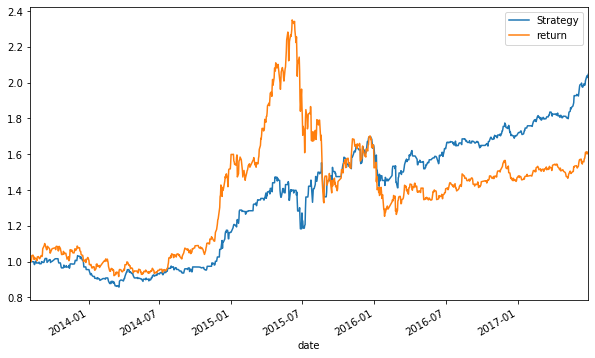

In [53]:
df2[['Strategy','return']].dropna().plot(figsize=(10, 6))

### 4. 训练集数据

In [38]:
predict_train = clf.predict(features_train)

In [39]:
df_train = pd.DataFrame(labels_train)
df_train['predict'] = predict_train
df_train = df_train.rename(columns = {'close': 'Next Close', 'predict':'Predict Next Close'})

In [40]:
df_train.head()

,Next Close,Predict Next Close
date,,
2005-05-13,875.27,892.963011
2005-05-16,881.46,863.716542
2005-05-17,883.20,886.176840
2005-05-18,884.17,882.980884
2005-05-19,882.76,889.767520


In [41]:
current_close_train = hs_20d[['close']].iloc[:2000]
current_close_train.head()

,close
date,
2005-05-13,887.54
2005-05-16,875.27
2005-05-17,881.46
2005-05-18,883.20
2005-05-19,884.17


In [42]:
next_open_train = hs300[['open']].iloc[20:2020].shift(-1)
next_open_train.head()

,open
date,
2005-05-13,885.39
2005-05-16,873.08
2005-05-17,881.14
2005-05-18,882.84
2005-05-19,883.51


In [43]:
df1_train = pd.merge(df_train, current_close_train, left_index=True, right_index=True)
df2_train = pd.merge(df1_train, next_open_train, left_index=True, right_index=True)
df2_train.columns = ['Next Close', 'Predicted Next Close', 'Current Close', 'Next Open']

In [44]:
df2_train.head()

,Next Close,Predicted Next Close,Current Close,Next Open
date,,,,
2005-05-13,875.27,892.963011,887.54,885.39
2005-05-16,881.46,863.716542,875.27,873.08
2005-05-17,883.20,886.176840,881.46,881.14
2005-05-18,884.17,882.980884,883.20,882.84
2005-05-19,882.76,889.767520,884.17,883.51


In [45]:
df2_train ['Signal'] = np.where(df2_train ['Predicted Next Close'] > df2_train ['Next Open'] + 5,1,0)
df2_train ['PL'] =  np.where(df2_train ['Signal'] == 1,(df2_train ['Next Close'] - df2_train ['Next Open'])/df2_train ['Next Open'],0)

In [46]:
df2_train['Strategy'] = (df2_train['PL'].shift(1)+1).cumprod()
df2_train['return'] = (df2_train['Next Close'].pct_change()+1).cumprod()

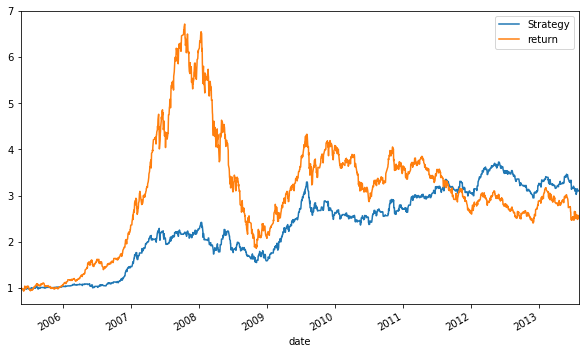

In [47]:
df2_train[['Strategy','return']].dropna().plot(figsize=(10, 6))

### 6. 样本外数据


In [54]:
hs_os = ts.get_k_data('hs300', '2017-07-01','2020-08-18') #get HS300 Outside of Sample data

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [55]:
hs_os.set_index('date',inplace = True)
hs_os.index = pd.to_datetime(hs_os.index)    #因为要merge操作，要把date转换成日期格式；
hs_os.head()

,open,close,high,low,volume,code
date,,,,,,
2017-07-03,3667.23,3650.85,3667.60,3633.78,88820860.0,hs300
2017-07-04,3646.83,3619.98,3646.85,3611.69,95071413.0,hs300
2017-07-05,3611.90,3659.68,3660.73,3610.46,88232425.0,hs300
2017-07-06,3654.56,3660.10,3666.77,3629.56,102379245.0,hs300
2017-07-07,3647.64,3655.93,3657.11,3631.87,103735497.0,hs300


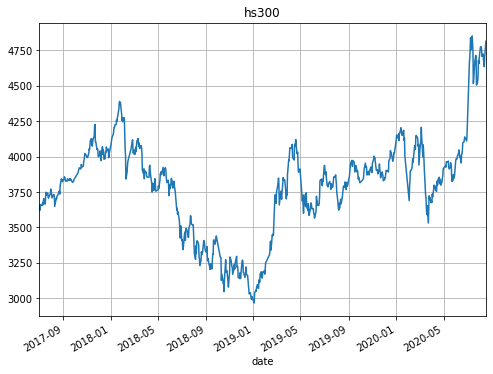

In [56]:
hs_os_close = hs_os['close']
hs_os_close.plot(figsize = (8,6),title = 'hs300', grid = True)

In [57]:
#特征工程

for i in range(1, 21, 1):
    hs_os['close - ' + str(i) + 'd'] = hs_os['close'].shift(i)

In [58]:
hs_os_20d = hs_os[[x for x in hs300.columns if 'close' in x]].iloc[20:]

In [59]:
hs_os_20d.head()

,close,close - 1d,close - 2d,close - 3d,close - 4d,close - 5d,close - 6d,close - 7d,close - 8d,close - 9d,...,close - 11d,close - 12d,close - 13d,close - 14d,close - 15d,close - 16d,close - 17d,close - 18d,close - 19d,close - 20d
date,,,,,,,,,,,,,,,,,,,,,
2017-07-31,3737.87,3721.89,3712.19,3705.39,3719.56,3743.47,3728.60,3747.88,3729.75,3667.18,...,3703.09,3686.92,3658.82,3670.81,3653.69,3655.93,3660.10,3659.68,3619.98,3650.85
2017-08-01,3770.38,3737.87,3721.89,3712.19,3705.39,3719.56,3743.47,3728.60,3747.88,3729.75,...,3663.56,3703.09,3686.92,3658.82,3670.81,3653.69,3655.93,3660.10,3659.68,3619.98
2017-08-02,3760.85,3770.38,3737.87,3721.89,3712.19,3705.39,3719.56,3743.47,3728.60,3747.88,...,3667.18,3663.56,3703.09,3686.92,3658.82,3670.81,3653.69,3655.93,3660.10,3659.68
2017-08-03,3727.83,3760.85,3770.38,3737.87,3721.89,3712.19,3705.39,3719.56,3743.47,3728.60,...,3729.75,3667.18,3663.56,3703.09,3686.92,3658.82,3670.81,3653.69,3655.93,3660.10
2017-08-04,3707.58,3727.83,3760.85,3770.38,3737.87,3721.89,3712.19,3705.39,3719.56,3743.47,...,3747.88,3729.75,3667.18,3663.56,3703.09,3686.92,3658.82,3670.81,3653.69,3655.93


In [60]:
hs_os_20d = hs_os_20d.iloc[:,::-1] 

In [61]:
hs_os_20d.head()

,close - 20d,close - 19d,close - 18d,close - 17d,close - 16d,close - 15d,close - 14d,close - 13d,close - 12d,close - 11d,...,close - 9d,close - 8d,close - 7d,close - 6d,close - 5d,close - 4d,close - 3d,close - 2d,close - 1d,close
date,,,,,,,,,,,,,,,,,,,,,
2017-07-31,3650.85,3619.98,3659.68,3660.10,3655.93,3653.69,3670.81,3658.82,3686.92,3703.09,...,3667.18,3729.75,3747.88,3728.60,3743.47,3719.56,3705.39,3712.19,3721.89,3737.87
2017-08-01,3619.98,3659.68,3660.10,3655.93,3653.69,3670.81,3658.82,3686.92,3703.09,3663.56,...,3729.75,3747.88,3728.60,3743.47,3719.56,3705.39,3712.19,3721.89,3737.87,3770.38
2017-08-02,3659.68,3660.10,3655.93,3653.69,3670.81,3658.82,3686.92,3703.09,3663.56,3667.18,...,3747.88,3728.60,3743.47,3719.56,3705.39,3712.19,3721.89,3737.87,3770.38,3760.85
2017-08-03,3660.10,3655.93,3653.69,3670.81,3658.82,3686.92,3703.09,3663.56,3667.18,3729.75,...,3728.60,3743.47,3719.56,3705.39,3712.19,3721.89,3737.87,3770.38,3760.85,3727.83
2017-08-04,3655.93,3653.69,3670.81,3658.82,3686.92,3703.09,3663.56,3667.18,3729.75,3747.88,...,3743.47,3719.56,3705.39,3712.19,3721.89,3737.87,3770.38,3760.85,3727.83,3707.58


In [76]:
features_test_os = hs_os_20d
labels_test_os = hs_os_20d['close'].shift(-1)

In [77]:
predict_os = clf.predict(features_test_os) 
predict_os[:20]

array([3647.51044103, 3618.34000435, 3675.12328299, 3668.17749616,
       3678.02342262, 3679.28964227, 3700.86515474, 3670.52081176,
       3677.2408089 , 3688.58737301, 3689.31072619, 3732.5857127 ,
       3751.70674884, 3757.48830333, 3710.29654622, 3760.94694414,
       3768.06855318, 3745.61809605, 3723.44210231, 3720.30432415])

In [78]:
df_os = pd.DataFrame(labels_test_os)

In [79]:
df_os

,close
date,
2017-07-31,3770.38
2017-08-01,3760.85
2017-08-02,3727.83
2017-08-03,3707.58
2017-08-04,3726.79
...,...
2020-08-11,4647.64
2020-08-12,4635.71
2020-08-13,4704.63


In [80]:
df_os['predict'] = predict_os

In [81]:
df_os.head()

,close,predict
date,,
2017-07-31,3770.38,3647.510441
2017-08-01,3760.85,3618.340004
2017-08-02,3727.83,3675.123283
2017-08-03,3707.58,3668.177496
2017-08-04,3726.79,3678.023423


In [84]:
df_os = df_os.rename(columns = {'close': 'Next Close', 'predict':'Predicted Next Close'})

In [85]:
df_os.head()

,Next Close,Predicted Next Close
date,,
2017-07-31,3770.38,3647.510441
2017-08-01,3760.85,3618.340004
2017-08-02,3727.83,3675.123283
2017-08-03,3707.58,3668.177496
2017-08-04,3726.79,3678.023423


In [86]:
current_close = hs_os_20d[['close']]
current_close.head()

,close
date,
2017-07-31,3737.87
2017-08-01,3770.38
2017-08-02,3760.85
2017-08-03,3727.83
2017-08-04,3707.58


In [87]:
next_open = hs_os[['open']][20:].shift(-1)    #把8月3号的开盘价放到了8月2号的位置；
next_open.head()

,open
date,
2017-07-31,3738.74
2017-08-01,3768.19
2017-08-02,3755.11
2017-08-03,3724.72
2017-08-04,3701.22


In [88]:
df1_os = pd.merge(df_os, current_close, left_index=True, right_index=True)
df1_os.head()

,Next Close,Predicted Next Close,close
date,,,
2017-07-31,3770.38,3647.510441,3737.87
2017-08-01,3760.85,3618.340004,3770.38
2017-08-02,3727.83,3675.123283,3760.85
2017-08-03,3707.58,3668.177496,3727.83
2017-08-04,3726.79,3678.023423,3707.58


In [89]:
df2_os = pd.merge(df1_os, next_open, left_index=True, right_index=True)

In [90]:
df2_os.head()

,Next Close,Predicted Next Close,close,open
date,,,,
2017-07-31,3770.38,3647.510441,3737.87,3738.74
2017-08-01,3760.85,3618.340004,3770.38,3768.19
2017-08-02,3727.83,3675.123283,3760.85,3755.11
2017-08-03,3707.58,3668.177496,3727.83,3724.72
2017-08-04,3726.79,3678.023423,3707.58,3701.22


In [91]:
df2_os.columns = ['Next Close', 'Predicted Next Close', 'Current Close', 'Next Open']

In [92]:
df2_os.head()

,Next Close,Predicted Next Close,Current Close,Next Open
date,,,,
2017-07-31,3770.38,3647.510441,3737.87,3738.74
2017-08-01,3760.85,3618.340004,3770.38,3768.19
2017-08-02,3727.83,3675.123283,3760.85,3755.11
2017-08-03,3707.58,3668.177496,3727.83,3724.72
2017-08-04,3726.79,3678.023423,3707.58,3701.22


In [93]:
df2_os['Signal'] = np.where(df2_os['Predicted Next Close'] > df2_os['Next Open'] + 5,1,0)

In [94]:
df2_os['PL'] =  np.where(df2_os['Signal'] == 1,(df2_os['Next Close'] - df2_os['Next Open'])/df2_os['Next Open'],0)

In [95]:
df2_os['Strategy'] = (df2_os['PL'].shift(1)+1).cumprod()
df2_os['return'] = (df2_os['Next Close'].pct_change()+1).cumprod()

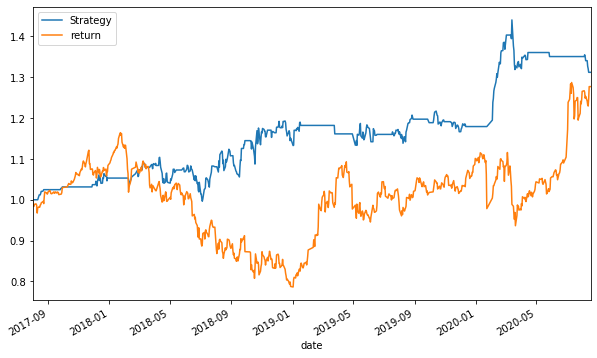

In [96]:
df2_os[['Strategy','return']].dropna().plot(figsize=(10, 6))

### Strategy outside of sample performed slightly better than the index, 
and it seems unable to catch the major trend in early 2019 and 2020